In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
cars_df=pd.read_csv("cars-dataset.csv")

In [81]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [82]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [83]:
cars_df=cars_df.drop(columns="car name")

In [84]:
# On inspecting records number 32, 126, 330,336, 354,374  we find "?" in the columns.
cars_df[cars_df["hp"].str.isnumeric()==False]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


In [85]:
#Replace them with nan and remove the records from the data frame that have "nan"
cars_df = cars_df.replace('?', np.nan)

In [86]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      392 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [60]:
#instead of dropping the rows having na, lets replace the missing values with median value. 
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively per Cylinder type  (axis =0 means columnwise)
# We can see that Cylinder tppes 4 and 6 have missing values here, hence their respective medians are used

cars_df[cars_df["cyl"]==4].hp.median()
cars_df[cars_df["cyl"]==6].hp.median()

cars_df["hp"] = np.where((cars_df["hp"].isna()==True) & (cars_df["cyl"]==4),cars_df[cars_df["cyl"]==4].hp.median(),cars_df["hp"])

cars_df["hp"] = np.where((cars_df["hp"].isna()==True) & (cars_df["cyl"]==6),cars_df[cars_df["cyl"]==6].hp.median(),cars_df["hp"])


In [90]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [91]:
cars_df['hp'] = cars_df['hp'].astype('float64')  # converting the hp column from object / string type to float


In [92]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [93]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.125628,38.313624,46.0,76.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252678DEAC8>,
      dtype=object)

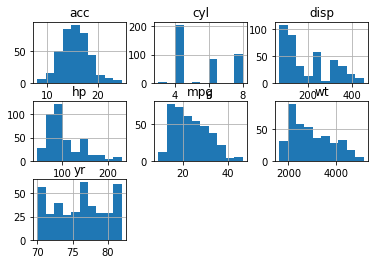

In [94]:
cars_df.hist()

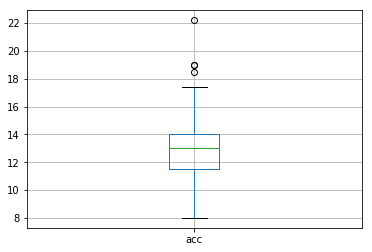

In [95]:
cars_df[cars_df["cyl"]==8].boxplot("acc")

In [96]:
cars_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.843781,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897520,0.932824,-0.543684,-0.370164,-0.804203
hp,0.843781,0.897520,1.000000,0.863608,-0.688085,-0.416827,-0.775590
wt,0.896017,0.932824,0.863608,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.688085,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.416827,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.775590,-0.831741,0.420289,0.579267,1.000000


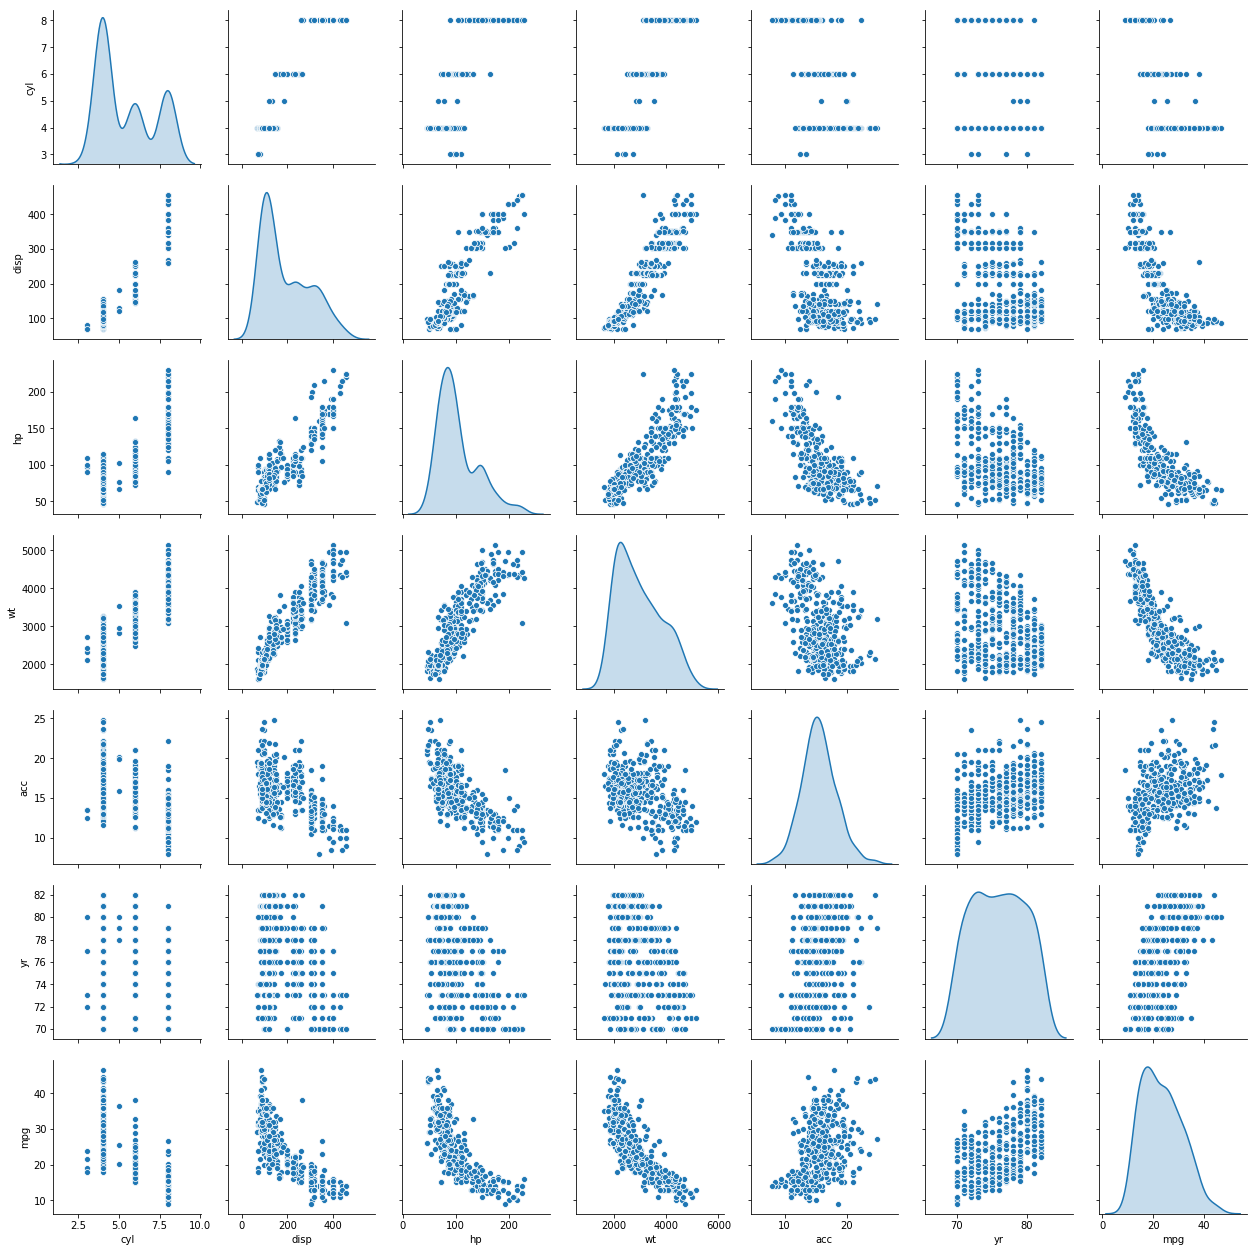

In [99]:
sns.pairplot(cars_df,diag_kind='kde',kind='scatter')

# It is clear from the above pairplot that when Weight increases, HP increases and when ACC decreases HP Increases. Based on this we can fill in the missing HP values

In [72]:
x=cars_df_num.groupby(["wt"])["hp"].agg("median")

In [85]:
x.dtype

dtype('float64')

In [13]:
#cars_df_num_features=cars_df_num.drop(columns="mpg")

In [100]:
# Let us check optimal number of clusters-


cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 10
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,num_clusters,cluster_errors
0,2,7.428912e+07
1,3,3.420828e+07
2,4,1.905611e+07
3,5,1.378338e+07
4,6,1.036885e+07
5,7,7.775834e+06
6,8,5.663125e+06
7,9,4.780371e+06


<Figure size 864x432 with 0 Axes>

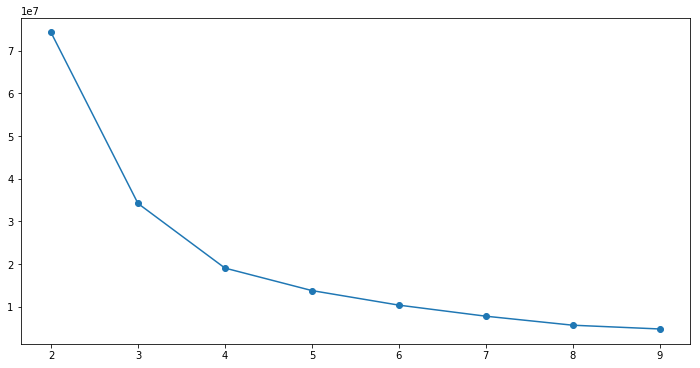

In [101]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [102]:
# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(cars_df)

# Getting the cluster labels

labels = kmeans.predict(cars_df)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[8.00000000e+00 3.56536232e+02 1.65130435e+02 4.36659420e+03
  1.30420290e+01 7.36086957e+01 1.39913043e+01]
 [4.71000000e+00 1.55100000e+02 9.40700000e+01 2.75536000e+03
  1.57670000e+01 7.72300000e+01 2.45540000e+01]
 [3.97857143e+00 9.81107143e+01 7.31785714e+01 2.10913571e+03
  1.66028571e+01 7.65928571e+01 3.07471429e+01]
 [6.64044944e+00 2.59966292e+02 1.16808989e+02 3.48448315e+03
  1.56752809e+01 7.55842697e+01 1.83528090e+01]]


In [104]:
colnames = cars_df.columns
prediction= kmeans.predict(cars_df)
#X["clusters"] = prediction
X_df = pd.DataFrame(cars_df, columns= colnames)
X_df["group"] = prediction


In [105]:
X_df

,cyl,disp,hp,wt,acc,yr,mpg,group
0,8,307.0,130.0,3504,12.0,70,18.0,3
1,8,350.0,165.0,3693,11.5,70,15.0,3
2,8,318.0,150.0,3436,11.0,70,18.0,3
3,8,304.0,150.0,3433,12.0,70,16.0,3
4,8,302.0,140.0,3449,10.5,70,17.0,3
5,8,429.0,198.0,4341,10.0,70,15.0,0
6,8,454.0,220.0,4354,9.0,70,14.0,0
7,8,440.0,215.0,4312,8.5,70,14.0,0
8,8,455.0,225.0,4425,10.0,70,14.0,0
9,8,390.0,190.0,3850,8.5,70,15.0,3


In [106]:
labels

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2,
       1, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 3, 3, 1, 1, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 3, 3, 2, 2, 2, 2,
       2, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 2, 2, 3, 1, 1, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 0, 2, 2, 2, 1, 3, 3, 3, 3,

In [107]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 8), dtype=float64)

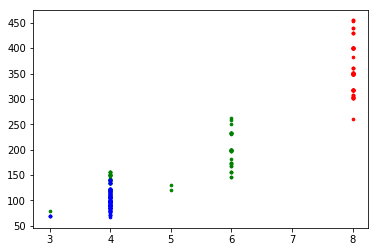

In [108]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

rang=range(0,3)
for i in rang:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002526DE17CC0>,
      dtype=object)

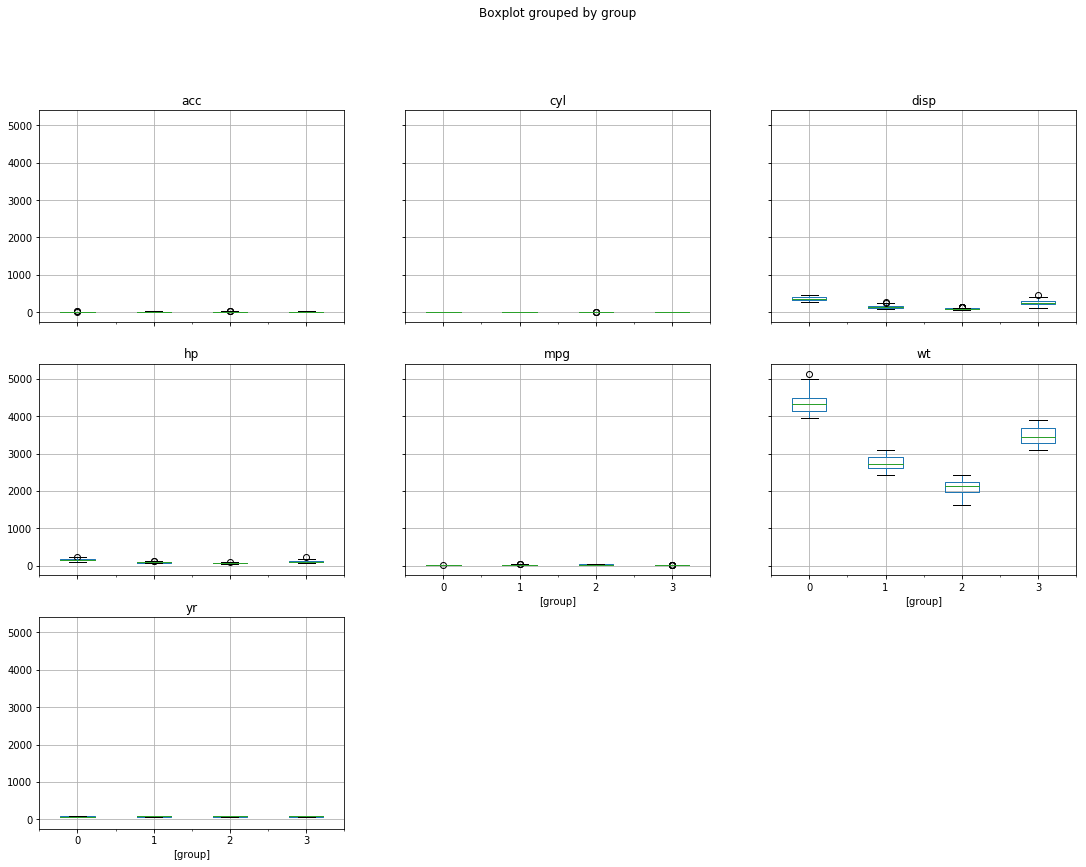

In [109]:


X_df.boxplot(by = 'group',  layout=(4,3), figsize=(18, 18))

In [110]:
cl_1=X_df[X_df["group"]==0].drop(columns="group")

In [111]:
cl_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 5 to 292
Data columns (total 7 columns):
cyl     69 non-null int64
disp    69 non-null float64
hp      69 non-null float64
wt      69 non-null int64
acc     69 non-null float64
yr      69 non-null int64
mpg     69 non-null float64
dtypes: float64(4), int64(3)
memory usage: 4.3 KB


In [112]:
cl_2=X_df[X_df["group"]==1].drop(columns="group")

In [113]:
cl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 15 to 397
Data columns (total 7 columns):
cyl     100 non-null int64
disp    100 non-null float64
hp      100 non-null float64
wt      100 non-null int64
acc     100 non-null float64
yr      100 non-null int64
mpg     100 non-null float64
dtypes: float64(4), int64(3)
memory usage: 6.2 KB


In [114]:
cl_3=X_df[X_df["group"]==2].drop(columns="group")

In [115]:
cl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 14 to 395
Data columns (total 7 columns):
cyl     140 non-null int64
disp    140 non-null float64
hp      140 non-null float64
wt      140 non-null int64
acc     140 non-null float64
yr      140 non-null int64
mpg     140 non-null float64
dtypes: float64(4), int64(3)
memory usage: 8.8 KB


In [116]:
cl_4=X_df[X_df["group"]==3].drop(columns="group")
cl_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 366
Data columns (total 7 columns):
cyl     89 non-null int64
disp    89 non-null float64
hp      89 non-null float64
wt      89 non-null int64
acc     89 non-null float64
yr      89 non-null int64
mpg     89 non-null float64
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


## Linear Regression

In [117]:
lnr=LinearRegression()

## Cluster 1 (cl_1)

In [118]:
# splitting data into training and test set for independent attributes



X =  cl_1.drop("mpg", axis=1)
y =  cl_1.pop("mpg")

In [119]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [120]:
lnr.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
lnr.score(train_set , train_labels) 

0.7300276774954215

In [122]:
lnr.coef_
lnr.intercept_

array([ 0.        ,  0.00208241, -0.01842899, -0.00222544, -0.41365604,
        0.43460447])

-0.40650044477360225

In [123]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.002082408445995581
The coefficient for hp is -0.018428990195989318
The coefficient for wt is -0.002225440727759283
The coefficient for acc is -0.4136560426006319
The coefficient for yr is 0.4346044736790774


In [124]:
# Let us check the intercept for the model

intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.40650044477360225


In [125]:
lnr.predict(test_set)

array([15.39775168, 14.0516446 , 14.32156027, 12.98623541, 17.85309985,
       14.57333303, 12.47652907, 16.69204427, 14.24403585, 13.85766276,
       13.54829249, 14.07864743, 12.55222567, 15.8781284 , 15.12367934,
       16.66931913, 15.81917171, 16.47799774, 14.74346832, 12.86296855,
       13.18597464])

In [126]:
lnr.score(test_set,test_labels)

0.2556824784083641

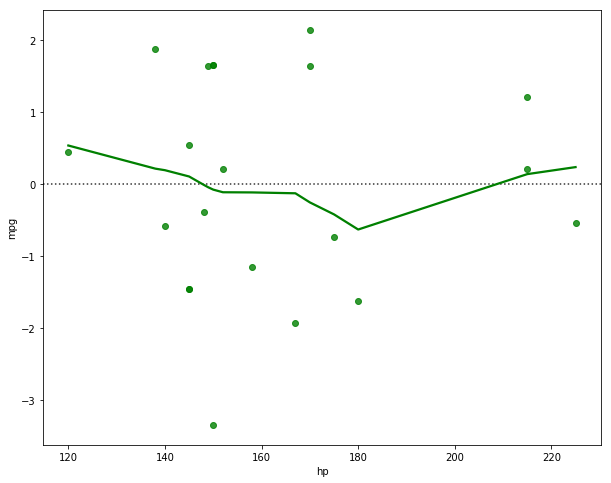

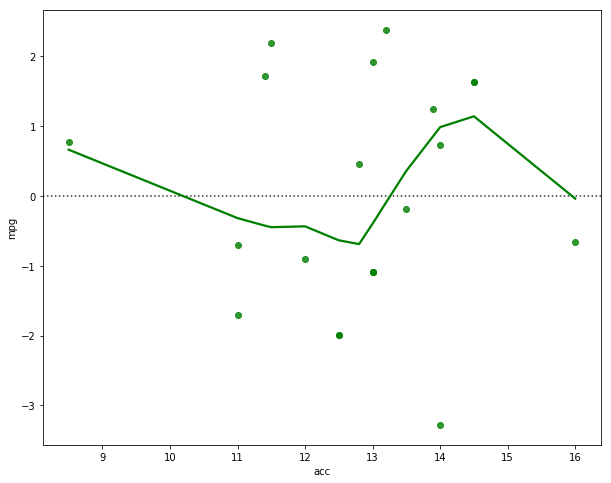

In [130]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )

# Cluster 2 (cl_2)

In [131]:
X =  cl_2.drop("mpg", axis=1)
y =  cl_2.pop("mpg")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

lnr.fit(train_set, train_labels)

lnr.score(train_set , train_labels) 

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))
    
intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.615157837930635

The coefficient for cyl is 0.45459447770671074
The coefficient for disp is -0.027014088825910575
The coefficient for hp is -0.03666788099909126
The coefficient for wt is -0.006990925840197778
The coefficient for acc is -0.2355515968139127
The coefficient for yr is 0.6825927916224311
The intercept for our model is 0.35972518136955856


In [132]:
lnr.predict(test_set)
lnr.score(test_set,test_labels)


array([28.78132155, 29.07018742, 24.41566539, 26.34383199, 29.07602765,
       20.9308444 , 24.03434192, 26.29908073, 29.64821735, 25.44933939,
       23.78342125, 21.38905135, 24.69703198, 27.24866212, 27.07540142,
       21.82913691, 24.80481803, 24.71061828, 27.65218086, 23.59155066,
       20.49484911, 29.22889034, 28.0360138 , 26.20776354, 21.42541111,
       22.50663062, 25.40394645, 24.09372547, 26.24410877, 25.40935771])

0.3422580259529975

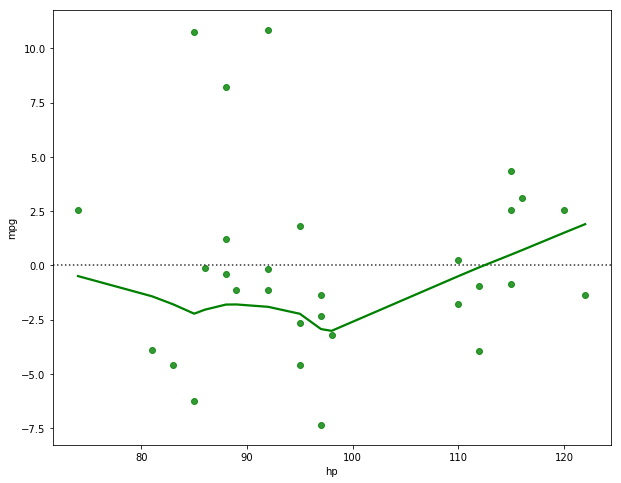

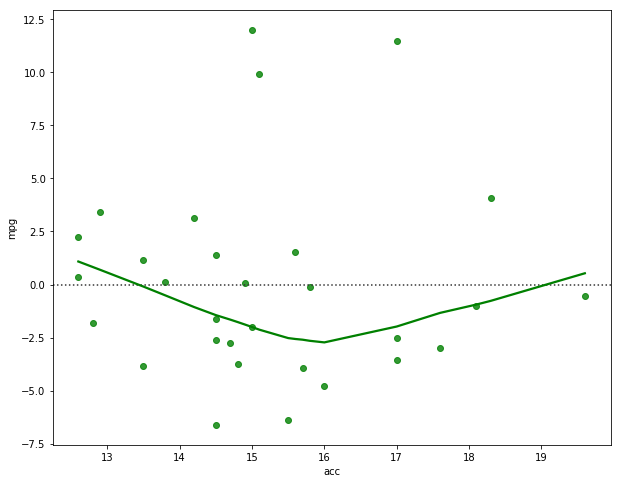

In [133]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )

# Cluster 3 (cl_3)

In [134]:
X =  cl_3.drop("mpg", axis=1)
y =  cl_3.pop("mpg")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

lnr.fit(train_set, train_labels)

lnr.score(train_set , train_labels) 

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))
    
intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.7119740436325381

The coefficient for cyl is 10.235209408415532
The coefficient for disp is -0.07954766283041612
The coefficient for hp is 0.02499209490827096
The coefficient for wt is -0.0061881029759308665
The coefficient for acc is 0.20787218282505598
The coefficient for yr is 1.0257923447965869
The intercept for our model is -72.7872718880997


In [135]:
lnr.predict(test_set)
lnr.score(test_set,test_labels)


array([32.23433259, 32.67379445, 30.52717695, 34.6435188 , 21.93204964,
       30.90194818, 26.9286704 , 24.52149794, 31.02055909, 31.88310325,
       35.00957581, 26.11974112, 34.73463451, 31.41485209, 30.53906225,
       36.66878364, 33.87395002, 31.70385368, 26.69599009, 35.54527371,
       25.00703763, 27.36647276, 25.50291029, 27.36881524, 30.01765392,
       32.86785553, 31.33517493, 37.66263145, 27.65906998, 36.12278495,
       30.74213424, 29.33833784, 23.00134059, 33.04276014, 35.86591589,
       34.56996705, 32.54187503, 36.69344895, 32.6438168 , 30.60200369,
       37.91689747, 22.60194948])

0.6240264593299811

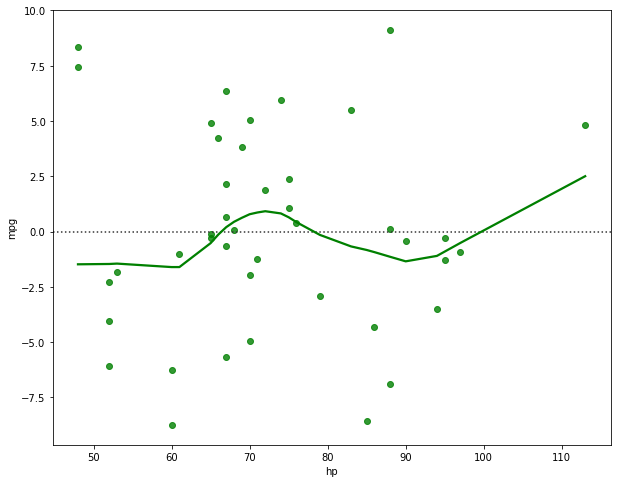

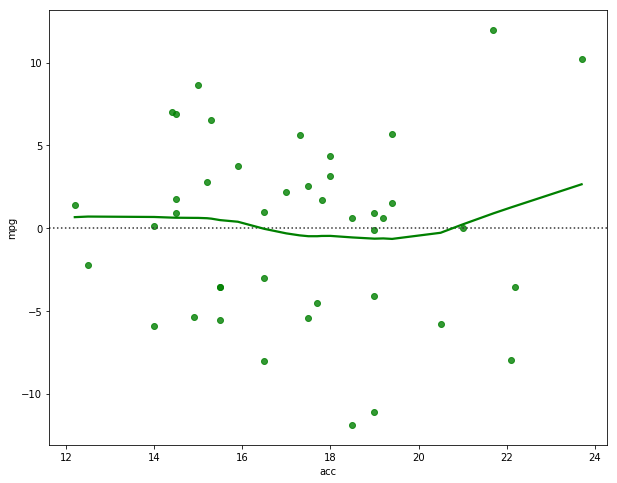

In [136]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )

# Cluster 4 (cl_4)

In [137]:
X =  cl_4.drop("mpg", axis=1)
y =  cl_4.pop("mpg")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

lnr.fit(train_set, train_labels)

lnr.score(train_set , train_labels) 

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))
    
intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.6585361031453522

The coefficient for cyl is 0.5095883097481873
The coefficient for disp is 0.0007417644265432511
The coefficient for hp is -0.040014059552087845
The coefficient for wt is -0.004280525877542179
The coefficient for acc is 0.12142473561727293
The coefficient for yr is 0.523937814380005
The intercept for our model is -6.673286572543255


In [138]:
lnr.predict(test_set)
lnr.score(test_set,test_labels)

array([22.30328108, 19.37234807, 20.08860322, 19.50385492, 20.38087615,
       21.17376473, 20.42096008, 19.59553743, 21.08719791, 19.65306548,
       20.56985526, 20.84316282, 20.57349961, 17.58424548, 22.77253663,
       17.5006148 , 16.71060376, 14.94062424, 18.15042023, 20.58106811,
       19.6220477 , 15.23491547, 23.44279757, 17.81011649, 17.27528524,
       21.83388981, 18.35197563])

-0.016194352843366566

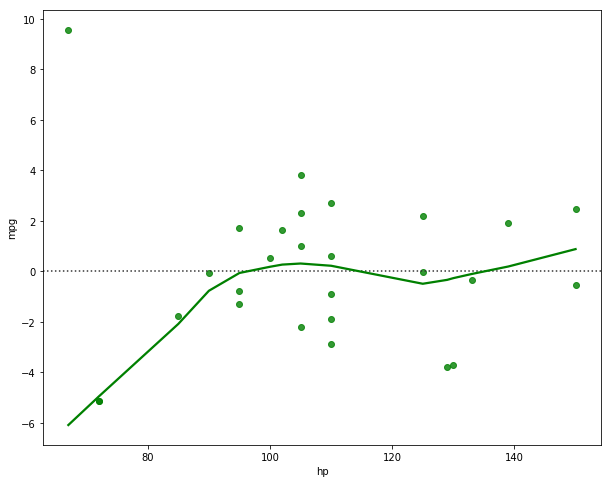

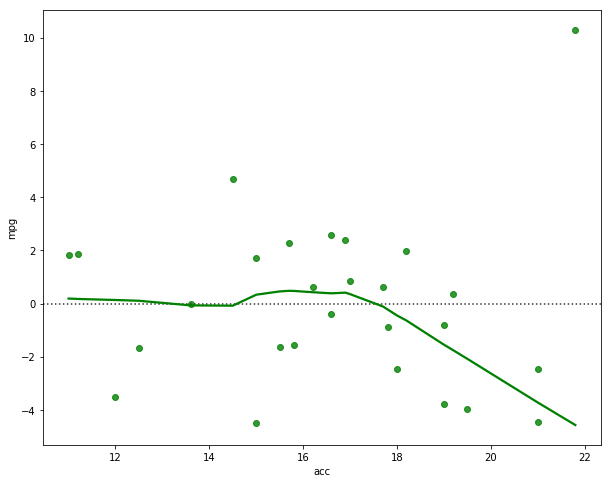

In [139]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )